# Setting up the notebook

In [2]:
## Datetime, date and time objects

In [4]:
# import pandas, numpy and datetime
import numpy as np
import pandas as pd

# needed for representing dates and times
import datetime 
from datetime import datetime

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# matplotlib and inline graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Representation of dates, time, and intervals

In [7]:
# datetime object for Dec 15 2014
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [9]:
# specific date and also with a time of 5:30 pm
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [11]:
# get the local "now" (date and time)
# can take a timezone, but that's not demonstrated here
datetime.now()

datetime.datetime(2024, 6, 28, 17, 15, 59, 58491)

In [13]:
# a date without time can be represented
# by creating a date using a datetime object
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [15]:
# get just the current date
datetime.now().date()

datetime.date(2024, 6, 28)

In [17]:
# get just a time from a datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [19]:
# get the current local time
datetime.now().time()

datetime.time(17, 16, 1, 761211)

## Timestamps

In [22]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [24]:
# a timestamp with both date and time
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [26]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:30')

Timestamp('2024-06-28 17:30:00')

In [28]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2024-06-28 17:16:04.963739')

## Timedelta

In [31]:
# what is one day from 2014-11-30?
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [33]:
# how many days between these two dates?
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(days=4)

# Time-series data

## The DatetimeIndex

In [37]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01   -0.611953
2014-08-02    0.387790
dtype: float64

In [39]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [41]:
# and we can see it is a collection of timestamps
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [45]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', 
                      '2014-08-02', 
                      '2014.8.3', 
                      None])
for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [47]:
# this is a list of objects, not timestamps...
pd.to_datetime(['Aug 1, 2014', 'foo'], errors='coerce')

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [51]:
# Convert list of strings to datetime, coercing invalid strings to NaT
dates = pd.to_datetime(['Aug 1, 2014', 'foo'], errors='coerce')

In [53]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [55]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [57]:
# a Series to demonstrate alignment
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [59]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [61]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

In [63]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [65]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [67]:
# 31 items for May 2014
s3['2014-05'] 

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [69]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

## Creating time-series data with specific frequencies

In [72]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90), 
                  pd.date_range('2014-08-01', 
                                '2014-10-29 23:59',
                                freq='T'))
bymin

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
                         ...   
2014-10-29 23:55:00   -0.563029
2014-10-29 23:56:00    1.180497
2014-10-29 23:57:00    1.850604
2014-10-29 23:58:00   -1.589660
2014-10-29 23:59:00    0.266429
Freq: T, Length: 129600, dtype: float64

In [74]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:10']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
2014-08-01 00:08:00   -0.861849
2014-08-01 00:09:00   -2.104569
2014-08-01 00:10:00   -0.494929
Freq: T, dtype: float64

In [76]:
# generate a series based upon business days
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
for d in days : print (d)

2014-08-29 00:00:00
2014-09-01 00:00:00
2014-09-02 00:00:00
2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00


In [78]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=10)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02',
               '2014-08-01 12:10:03', '2014-08-01 12:10:04',
               '2014-08-01 12:10:05', '2014-08-01 12:10:06',
               '2014-08-01 12:10:07', '2014-08-01 12:10:08',
               '2014-08-01 12:10:09', '2014-08-01 12:10:10'],
              dtype='datetime64[ns]', freq='S')

# Calculating new dates using offsets

## Date offsets

In [82]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [84]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

In [86]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1) 
d + do

Timestamp('2014-08-30 00:00:00')

In [88]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [90]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [92]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [94]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [96]:
# calculate the date of the Tuesday previous
# to a specified date 
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

## Anchored Offsets

In [99]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01', 
                           '2014-08-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-08-06T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-20T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [101]:
# what are all of the business quarterly end
# dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31', 
                      freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

# Durations of time using Period objects

## The Period

In [105]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [107]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [109]:
# calculate the period that is one frequency
# unit of the aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [111]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

## The PeriodIndex

In [114]:
# create a period index representing all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]')

In [116]:
# loop through all period objects in the index
# printing start and end time for each
for p in mp2013: 
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [118]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2013-08   -1.044236
2013-09   -0.861849
2013-10   -2.104569
2013-11   -0.494929
2013-12    1.071804
Freq: M, Length: 12, dtype: float64

In [120]:
# create a Series with a PeriodIndex and which
# represents all calendar month periods in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24), 
               pd.period_range('1/1/2013', 
                               '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [122]:
# get value for period represented with 2014-06
ps['2014-06']

0.567020349793672

In [124]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [126]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

# Handling holidays using calendars

In [129]:
# demonstrate using the US federal holiday calendar
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [131]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())

# now calc next business day from 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

# Normalizing timestamps using time zones

In [134]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2024-06-28 17:18:02.610104'), True)

In [136]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

In [138]:
# import common timezones from pytz
from pytz import common_timezones
# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [140]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2024-06-28 17:18:04.290009'),
 Timestamp('2024-06-28 17:18:04.290009+0000', tz='UTC'))

In [142]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [144]:
# create a DatetimeIndex using a timezone
rng = pd.date_range('3/6/2012 00:00:00', 
                    periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [146]:
# show use of timezone objects
# need to reference pytz
import pytz
# create an object for two different timezones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
mountain_tz.localize(now), eastern_tz.localize(now)

(Timestamp('2024-06-28 17:18:04.290009-0600', tz='US/Mountain'),
 Timestamp('2024-06-28 17:18:04.290009-0400', tz='US/Eastern'))

In [148]:
# create two Series, same start, same periods, same frequencies,
# each with a different timezone
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01', 
                                        periods=5, freq="H", 
                                        tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5), 
                   index=pd.date_range('2014-08-01', 
                                       periods=5, freq="H", 
                                       tz='US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int64

In [150]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int64

In [152]:
# add the two Series. This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [154]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [156]:
# this will be the same result as s_eastern + s_mountain
# as the timezones still get aligned to be the same
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

# Manipulating time-series data

## Shifting and lagging 

In [160]:
# create a Series to work with
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5],
            pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [162]:
# shift forward one day
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [164]:
# lag two days
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [166]:
# calculate daily percentage change
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

In [168]:
# shift forward one business day
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [170]:
# shift forward five hours
ts.tshift(5, freq="H")

/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_24010/1586542303.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts.tshift(5, freq="H")


2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [172]:
# shift using a DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
dtype: float64

In [181]:
# shift just the index values
ts.shift(-1, freq='H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

## Frequency Conversion

In [184]:
# create a Series of incremental values
# index by hour through all of August 2014
periods = 31 * 24
hourly = Series(np.arange(0, periods),
               pd.date_range('08-01-2014', freq="2H", 
                             periods = periods))
hourly

2014-08-01 00:00:00      0
2014-08-01 02:00:00      1
2014-08-01 04:00:00      2
2014-08-01 06:00:00      3
2014-08-01 08:00:00      4
                      ... 
2014-10-01 14:00:00    739
2014-10-01 16:00:00    740
2014-10-01 18:00:00    741
2014-10-01 20:00:00    742
2014-10-01 22:00:00    743
Freq: 2H, Length: 744, dtype: int64

In [186]:
# convert to daily frequency
# many items will be dropped due to alignment
daily = hourly.asfreq('D')
daily

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, Length: 62, dtype: int64

In [188]:
# convert back to hourly.  Results in many NaNs
# as the new index has many labels that do not
# align from the source
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

In [190]:
# forward fill values
daily.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

In [192]:
daily.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

## Up and down resampling

In [195]:
# calculate a random walk five days long at one second intervals
# this many items will be needed
count = 24 * 60 * 60 * 5
# create a series of values
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
# calculate the walk
walk = ws.cumsum()
# patch the index
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [197]:
# resample to minute intervals
walk.resample("1Min")

In [199]:
# calculate the mean of the first minute of the walk
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [205]:
# use a right close
walk.resample("1Min", closed='right')

In [209]:
# take the first value of each bucket
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [213]:
# resample to 1 minute intervales, then back to 1 sec
bymin = walk.resample("1Min").first()
bymin.resample('S')

In [221]:
# resample to 1 second intervales using forward fill
bymin.resample('S').bfill()

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01    -10.886314
2014-08-01 00:00:02    -10.886314
2014-08-01 00:00:03    -10.886314
2014-08-01 00:00:04    -10.886314
                          ...    
2014-08-05 23:58:56    446.877810
2014-08-05 23:58:57    446.877810
2014-08-05 23:58:58    446.877810
2014-08-05 23:58:59    446.877810
2014-08-05 23:59:00    446.877810
Freq: S, Length: 431941, dtype: float64

In [223]:
# demonstate interoplating the NaN values
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.279855
2014-08-01 00:00:02      0.090598
2014-08-01 00:00:03     -0.098659
2014-08-01 00:00:04     -0.287916
                          ...    
2014-08-05 23:58:56    446.902157
2014-08-05 23:58:57    446.896071
2014-08-05 23:58:58    446.889984
2014-08-05 23:58:59    446.883897
2014-08-05 23:59:00    446.877810
Freq: S, Length: 431941, dtype: float64

In [231]:
# show ohlc resampling
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low       close
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   -2.922520
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154  -55.101543
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456    1.913276
2014-08-01 03:00:00    0.260576   17.124638  -65.820652  -38.530620
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294  -61.014553
...                         ...         ...         ...         ...
2014-08-05 19:00:00  437.652077  550.408942  430.549178  494.471788
2014-08-05 20:00:00  496.539759  510.371745  456.365565  476.505765
2014-08-05 21:00:00  476.025498  506.952877  425.472410  498.547578
2014-08-05 22:00:00  497.941355  506.599652  411.119919  443.925832
2014-08-05 23:00:00  443.017962  489.083657  426.062444  456.191430

[120 rows x 4 columns]

# Time series moving window operations

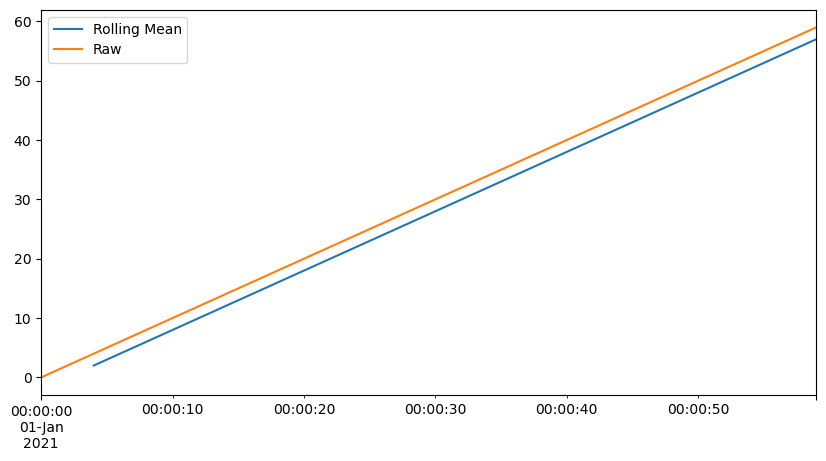

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series with a datetime index
rng = pd.date_range('2021-01-01', periods=120, freq='S')
walk = pd.Series(range(120), index=rng)

# Select the first minute of data
first_minute = walk['2021-01-01 00:00:00':'2021-01-01 00:00:59']

# Calculate a rolling mean window of 5 periods
rolling_mean = first_minute.rolling(window=5).mean()

# Plot the rolling mean against the raw data
plt.figure(figsize=(10, 5))
rolling_mean.plot(label='Rolling Mean')
first_minute.plot(label='Raw')
plt.legend(labels=['Rolling Mean', 'Raw'])
plt.show()

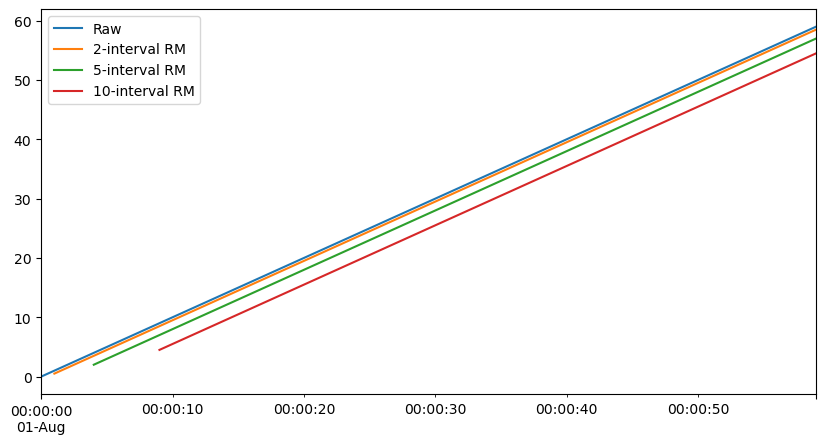

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series with a datetime index
rng = pd.date_range('2014-08-01', periods=120, freq='S')
walk = pd.Series(range(120), index=rng)

# Select the first minute of data
h1w = walk['2014-08-01 00:00:00':'2014-08-01 00:00:59']

# Calculate rolling means for 2, 5, and 10 intervals
rolling_mean_2 = h1w.rolling(window=2).mean()
rolling_mean_5 = h1w.rolling(window=5).mean()
rolling_mean_10 = h1w.rolling(window=10).mean()

# Plot the raw data and the rolling means
plt.figure(figsize=(10, 5))
h1w.plot(label='Raw')
rolling_mean_2.plot(label='2-interval RM')
rolling_mean_5.plot(label='5-interval RM')
rolling_mean_10.plot(label='10-interval RM')

# Add a legend
plt.legend(labels=['Raw', '2-interval RM', '5-interval RM', '10-interval RM'])
plt.show()


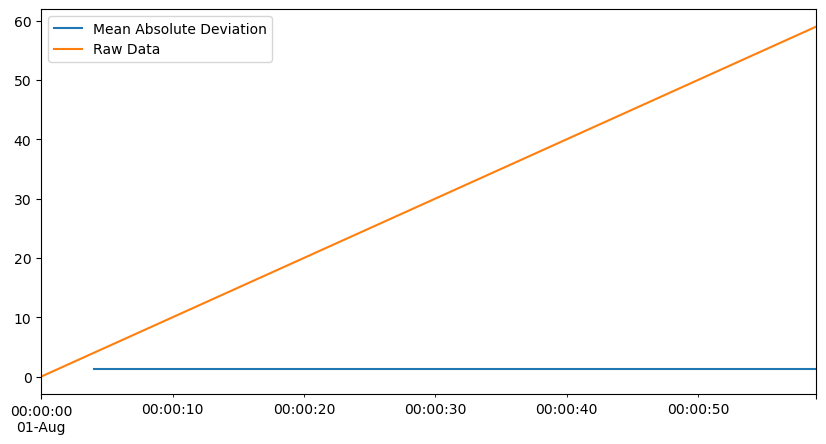

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample time series with a datetime index
rng = pd.date_range('2014-08-01', periods=120, freq='S')
walk = pd.Series(range(120), index=rng)

# Select the first minute of data
h1w = walk['2014-08-01 00:00:00':'2014-08-01 00:00:59']

# Define the mean absolute deviation function
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()

# Calculate the mean absolute deviation with a window of 5 intervals
mad_rolling = h1w.rolling(window=5).apply(mean_abs_dev, raw=True)

# Plot the results
plt.figure(figsize=(10, 5))
mad_rolling.plot(label='Mean Absolute Deviation')
h1w.plot(label='Raw Data')
plt.legend()
plt.show()


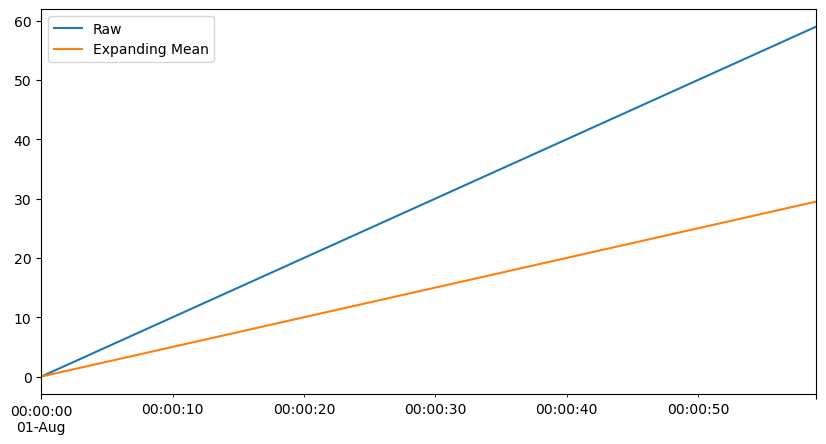

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample time series with a datetime index
rng = pd.date_range('2014-08-01', periods=120, freq='S')
walk = pd.Series(range(120), index=rng)

# Select the first minute of data
h1w = walk['2014-08-01 00:00:00':'2014-08-01 00:00:59']

# Calculate the expanding mean
expanding_mean = h1w.expanding(min_periods=1).mean()

# Plot the raw data and the expanding mean
plt.figure(figsize=(10, 5))
h1w.plot(label='Raw')
expanding_mean.plot(label='Expanding Mean')
plt.legend()
plt.show()
